# Clean and Analyze Employee Exit Surveys


### Introduction
In this project we will work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. An analysis will be made of the satisfaction of employees and their time working for the company. Moreover analysises will be made of employees that resign in relation to age.

### Datasets
In this guided project, we'll work with exit surveys from employees of the `Department of Education, Training and Employment` (DETE) and the `Technical and Further Education` (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). DataQuest has made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

### Goals
We want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.


### Overview Datasets

Because there was no data dictionary, Dataquest has assigned definitions to the columns of these datasets.

##### Dete Survey
Below is a preview of a couple columns we'll work with from the dete_survey.csv:

* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE


##### Tafe Survey
Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall`. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


Let's start by reading the datasets into pandas and exploring them.

In [1]:
# Reading in both datasets into pandas

import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
# Finding NaN values
missing = dete_survey.isnull().sum()
print(missing)

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
# Finding NaN values
missing = tafe_survey.isnull().sum().sort_values()
print(missing)

Record ID                                                          0
Institute                                                          0
WorkArea                                                           0
Reason for ceasing employment                                      1
CESSATION YEAR                                                     7
                                                                ... 
Contributing Factors. Career Move - Public Sector                265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Ill Health                                 265
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Main Factor. Which of these was the main factor for leaving?     589
Length: 72, dtype: int64


the dete_survey dataset contains 55 columns, the indigenious information columns about employees have the most missing values, and after that the Disability and NESB column. Moreover the dataset contains mostly string values.

The tafe_survey dataset contains 72 columns and 702 entries. The columns missing the most values is: 'Main Factor. Which of these was the main factor for leaving?', with 589 values missing. The other top 4 columns  with the most missing values are related to contributing factors and Inductioninfo.



## Identifying Missing Values and Drop Unnecessary Columns

### Observations

From our work in the previous screen, we can make the following observations:

* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues. We will use the pd.read_csv() function to specify values that should be represented as NaN. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

In [8]:
# Reading 'Not Stated' in as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [9]:
# Dropping columns what we don't need for our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [10]:
# Dropping columns that we don't need for our analysis
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

### Changes in the Dataframes
* I deleted column 28 until column 49 from the dete_survey data set and saved the result in dete_survey_updated.
* Furthermore I deleted column 17 until 66 from the tafe_survey and saved the result in tafe_survey_updated.

The reason for removing these columns is that these columns contained the same kind of data and are unnecessary for the analysis.


## Clean Column Names

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

dete_survey | tafe_survey |	Definition
:------------|:-------------|:-----------
ID 	         | Record ID    | An id used to identify the participant of the survey
SeparationType| Reason for ceasingemployment |The reason why the participant's employment ended 
Cease Date   | CESSATION YEAR |	The year or month the participant's employment ended
DETE Start Date|	          | The year the participant began employment with the DETE
               | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years)
Age 	     | CurrentAge. Current Age | The age of the participant
Gender 	     | Gender. What is your Gender? | The gender of the participant

Because we eventually want to combine them, we'll have to standardize the column names. We will use the DataFrame.columns attribute along with vectorized string methods to update all of the columns at once.

In [11]:
# Printing an array of the existing Dete column names
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

### Renaming the Dete Column Names

We now will update the column names and:

* Make all the capitalization lowercase.
* Remove any trailing whitespace from the end of the strings.
* Replace spaces with underscores ('_').

In [12]:
# Renaming the Dete column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip().str.replace(' ', '_')

In [13]:
# Printing an array of the updated Dete column names
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

### Updating the Tafe Survey Column Names
    
* 'Record ID': 'id'
* 'CESSATION YEAR': 'cease_date'
* 'Reason for ceasing employment': 'separationtype'
* 'Gender. What is your Gender?': 'gender'
* 'CurrentAge. Current Age': 'age'
* 'Employment Type. Employment Type': 'employment_status'
* 'Classification. Classification': 'position'
* 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
* 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [14]:
# Renaming the existing column names
new_cols = ({'Record ID': 'id','CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})


tafe_survey_updated.rename(columns = new_cols, inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [15]:
# Viewing changes in Dete Survey
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [16]:
# Viewing changes in Tafe Survey
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Changes in the Dataframes
I renamed the column names of both datasets in order to navigate the data easier for the analysis. In the Dete_survey_updated dataframe I cleaned the column names so data can be retrieved by columnname easier. And I changed some column names of the tafe_survey_updated dataframe in order to make the column names shorter and still descriptive. 

## Filter the Data

In the last screen we renamed the columns that we will use for our analysis. Now we will remove more of the data we don't need.

Recall that our end goal is to answer the following question:
* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `'Resignation'`.

Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

Remember that we'll have to account for each of these variations so we don't unintentionally drop data!

In [17]:
# Reviewing the unique values in the separationtype column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [18]:
# Reviewing the unique values in the separationtype column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [19]:
# Select all three Resignation separation types from dete_survey_updated
resignation = r"[Rr]esignation"
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(resignation)].copy()
print(dete_resignations.head())

    id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...  work_life_balance  \
3

In [20]:
# Selecting all Resignation separation types from tafe_survey_updated
resignation = r"[Rr]esignation"
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].notnull()]
tafe_resignations = tafe_resignations[tafe_resignations['separationtype'].str.contains(resignation)].copy()
print(tafe_resignations.head())

             id                              Institute  \
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   
6  6.341520e+17         Barrier Reef Institute of TAFE   
7  6.341537e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date separationtype  \
3  Non-Delivery (corporate)      2010.0    Resignation   
4       Delivery (teaching)      2010.0    Resignation   
5       Delivery (teaching)      2010.0    Resignation   
6  Non-Delivery (corporate)      2010.0    Resignation   
7       Delivery (teaching)      2010.0    Resignation   

  Contributing Factors. Career Move - Public Sector   \
3                                                  -   
4                                                  -   
5                                                  -   
6                                                  -   
7                     

Because we want to know the details behind the resignation of the employees. I gathered from both datasets all of the data on the resignation types and copied them to new dataframes.

## Verify the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge).

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

* Since the `cease_date` is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

### Cleaning the cease_date column in dete_resignations

In [21]:
print(dete_resignations['cease_date'].value_counts()) # view unique values

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64


In [22]:
# Extracting the years from the cease_date column
pattern = r"(?P<Years>[1-2][0-9]{3})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float) # convert to a float type

In [23]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [24]:
# viewing unique values in start_date column of dete_resignations
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [25]:
# Viewing unique values of cease_date column of tafe_resignations
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [26]:
# Viewing sorted dete_start_date column series in descending order
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

### Results checking start and cease data

First I cleaned the `cease_date` column in dete_resignation in order to be able to analyze the data better. The cease date in the dete survey data ranges from 2006 to 2014. For the tafe survey data the cease years range from 2009 tot 2013. This seems to be accurate.

The earliest date in the `dete_start_date` column is 1963 and the oldest date is 2013, so the starting years in the dete survey data seem to be accurate as well.

## Create a New Column

From the work we did in the last screen, we can verify:

1. There aren't any major issues with the years.
2. The years in each dataframe don't span quite the same number of years. 

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column.

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The `tafe_resignations` dataframe already contains a "service" column, which Dataqueste has already renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

We will need to use data to calculate the length of time the employee spent in their workplace.

In [27]:
# Creating a new institute service column in dete resignations
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [28]:
print("Years of service")
print(dete_resignations['institute_service'].value_counts().sort_index(ascending=True))

Years of service
0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64


I created a new institute_service column in dete_resignations by substracting the `dete_start_date` from the `cease_date` and assigned this data to that new column. So now we know the years of service of employees that filled the dete survey data.

## Identify Dissatisfied Employees

In the last screen, we created a new `institute_service` column that we'll use to analyze survey respondents according to their length of employment. Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

1. tafe_survey_updated:
    + Contributing Factors. Dissatisfaction
    + Contributing Factors. Job Dissatisfaction
    
  
2. dete_survey_updated:
     + job_dissatisfaction
     + dissatisfaction_with_the_department
     + physical_work_environment
     + lack_of_recognition
     + lack_of_job_security
     + work_location
     + employment_conditions
     + work_life_balance
     + workload
     
     
If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column. 

#### Creating the New Dissatisfied Column
The first step in making the new column is to convert the values in the `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` columns in the `tafe_resignations` dataframe to `True`, `False`, or `NaN` values.

The second step: Adding the values to the new column

If any of the columns listed above contain a True value, we'll add a True value to a new column named dissatisfied. To accomplish this, we'll use the DataFrame.any() method to do the following:

* Return True if any element in the selected columns above is True
* Return False if none of the elements in the selected columns above is True
* Return NaN if the value is NaN

In [29]:
# Viewing dissatisfaction columns in tafe_resignations
print("\x1b[1m Dissatisfaction\x1b[0m")
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())

print("\n\x1b[1m Job Dissatisfaction\x1b[0m")
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

 Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

 Job Dissatisfaction
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [30]:
# Updating values in dissatisfaction columns 
# so that each contains only True, False, or NaN vals

def update_vals(val):
    if pd.isnull(val):
        return(np.nan)
    if val == '-':
        return (False)
    return (True)

cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

# Apply the update_vals function with df.applymap()
# And creating a dissatisfied column with df.any()
tafe_resignations['dissatisfied'] = tafe_resignations[cols].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
print("\n\x1b[1mDissatisfied Tafe_Resignations New Column\x1b[0m")
print(tafe_resignations['dissatisfied'].value_counts())


Dissatisfied Tafe_Resignations New Column
False    241
True      91
Name: dissatisfied, dtype: int64


In [31]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
        'dissatisfaction_with_the_department','physical_work_environment',
        'lack_of_recognition','lack_of_job_security','work_location',
        'employment_conditions','work_life_balance',
        'workload']].any(axis = 1,skipna = False)

dete_resignations_up = dete_resignations.copy()
print("\n\x1b[1mDissatisfied Dete_Resignations New Column\x1b[0m")
print(dete_resignations_up['dissatisfied'].value_counts())


Dissatisfied Dete_Resignations New Column
False    162
True     149
Name: dissatisfied, dtype: int64


### Results
First I updated the values in the dissatisfied columns of the tafe_resignations dataset, so it also aligns with the dete_resignations dataset. I inserted False values if a value was missing or if a value contained '-', in all the other cases I gave a True value. 
Then, I made a dissatisfied column in the tafe_resignations dataset and the dete_resignations set in order to classify resignation due to dissatisfaction.

Now, the new dissatisfied column contains just the following values:

* True: indicates a person resigned because they were dissatisfied with the job
* False: indicates a person resigned because of a reason other than dissatisfaction with the job
* NaN: indicates the value is missing

## Combine the Data

To recap, we've accomplished the following:

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column. So, now I will first get the data into a form that it is easy to aggregate.

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [32]:
# Adding a new column 'institute' where each row contains the value DETE
dete_resignations_up['institute'] = 'DETE'

# Adding a new column 'institute' where each row contains the value TAFE
tafe_resignations_up['institute'] = 'TAFE'

#### Combining the Dataframes

In [33]:
# Combining the dataframes and assigning the result to combined
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

#### Dropping Columns

Now I will drop any columns with less than 500 non null values. Because we don't need them for the final analysis.

In [34]:
# Dropping columns with less than 500 non values with thresh param
# and assigning the result to combined_updated
combined_updated = combined.dropna(axis=1, thresh = 500).copy()
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


In [35]:
print("\n\x1b[1mCombined Dataframe Not Null Sorted\x1b[0m")
print(combined_updated.notnull().sum().sort_values())
print("\n\x1b[1mCombined Dataframe NaN Values Sorted\x1b[0m")
print(combined_updated.isna().sum().sort_values())


Combined Dataframe Not Null Sorted
institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
separationtype       651
institute            651
dtype: int64

Combined Dataframe NaN Values Sorted
id                    0
separationtype        0
institute             0
dissatisfied          8
cease_date           16
position             53
employment_status    54
age                  55
gender               59
institute_service    88
dtype: int64


I cleaned the dataset from columns that had 500 or less non null values in order to make the aggregation of the data easier.

## Clean the Service Column

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the institute_service column. This column is tricky to clean because it currently contains values in a couple different forms.

To analyze the data, we'll convert these numbers into categories. We'll base our analysis on [this](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Let's categorize the values in the `institute_service` column using the definitions above.

#### Extracting the Years of Service
First, we'll extract the years of service from each value in the `institute_service` column.

In [36]:
# Changing the type of the institute_service column to 'str'
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
# Viewing the unique vals
combined_updated['institute_service'].unique()

array(['7.0', '18.0', '3.0', '15.0', '14.0', '5.0', 'nan', '30.0', '32.0',
       '39.0', '17.0', '9.0', '6.0', '1.0', '35.0', '38.0', '36.0',
       '19.0', '4.0', '26.0', '10.0', '8.0', '2.0', '0.0', '23.0', '13.0',
       '16.0', '12.0', '21.0', '20.0', '24.0', '33.0', '22.0', '28.0',
       '49.0', '11.0', '41.0', '27.0', '42.0', '25.0', '29.0', '34.0',
       '31.0', '3-4', '7-10', '1-2', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

In [37]:
# Extracting the years of service from each pattern + changing again to float
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)').astype('float')

#### Mapping Each Value to Career Stage Definitions

Next, I will mapp each value to one of the career stage definitions above.

In [38]:
# A function that maps each year value to one of the career stages
def map_years_to_category(val):
    if pd.isnull(val):
        return('Unknown')
    elif val < 3:
        return('New')
    elif val > 2 and val < 7:
        return('Experienced')
    elif val > 6 and val < 11:
        return('Established')
    else:
        return('Veteran')

In [39]:
# Viewing the unique values in institute_service column
combined_updated['institute_service'].unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

In [40]:
# Applying the function to the institute_service column
# and assigning the result to a new column 'service_cat'
combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_years_to_category)

In [41]:
print(combined_updated['service_cat'])

0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
          ...     
646    Experienced
647            New
648        Unknown
649    Experienced
650    Experienced
Name: service_cat, Length: 651, dtype: object


#### Results

In order to analyze the data of institute_service further, I converted the numbers of years of service into categories. According to years of service, I assigned a category to the data and saved the results to a new column `service_cat`.

## Perform Initial Analysis


In the last screen, we created a service_cat column, that categorizes employees according to the amount of years spent in their workplace:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Now, let's finally do our first piece of analysis! 
Now I will need to deal with missing values in the `dissatisfied` column and then aggregate the data.

Recall that the `dissatisfied` column consists of Boolean values, meaning they're either `True` or `False`. Methods such as the `df.pivot_table()` method actually treat Boolean values as integers, so a `True` value is considered to be `1` and a `False` value is considered to be `0`. That means that we can aggregate the `dissatisfied` column and calculate the number of people in each group, the percentage of people in each group, etc.

### Confirming Number of Values

In [42]:
# Counting the True and False values in the dissatisfied column
print("\n\x1b[1mDissatisfied Column: with Missing Values\x1b[0m")
combined_updated['dissatisfied'].value_counts(dropna=False)


Dissatisfied Column: with Missing Values


False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [43]:
# Replacing missing values in the dissatisfied column)
combined_updated['dissatisfied'].fillna(False, inplace=True)

print("\n\x1b[1mDissatisfied Column: After Replacing Missing Values\x1b[0m")
print(combined_updated['dissatisfied'].value_counts(dropna=False))


Dissatisfied Column: After Replacing Missing Values
False    411
True     240
Name: dissatisfied, dtype: int64


### Calculating Percentage of Dissatisfied Employees

Now I will calculate the percentage of dissatisfied employees in the `service_cat` column with the DataFrame.pivot_table() method.
* Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees. The default aggregation function is the mean, so I can exclude the aggfunc argument

In [44]:
# Using DataFrame.pivot_table() method to calculate in service_cat
pivot_table = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied')
print("\n\x1b[1mPercentage of Dissatisfied Employees per Group\x1b[0m")
print(pivot_table)


Percentage of Dissatisfied Employees per Group
             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Unknown          0.295455
Veteran          0.485294


### Plotting the Results

In [45]:
%matplotlib inline

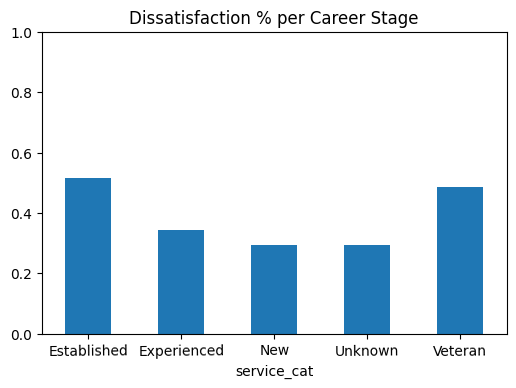

In [46]:
# Creating a bar chart of the service_cat column values 
pivot_table.plot(kind='bar', ylim = (0,1), title = 'Dissatisfaction % per Career Stage', legend=False, rot=0.5)

## Observations
- Employees with 7 - 10 years of service, is the most dissatisfied group with a percentage of 51.6%.
- The second group with the biggest percentage of dissatisfaction is the Veteran group, with 11+ years of service making up 48.5%.
- The third group with the highest dissatisfaction rate is the Experienced group with 3 to 6 years, and a rate of 34%.

From these results a correlation can be made, namely that the longer an employee works for a company, the higher the dissatisfaction rate is.
